In [1]:
def main():
    # Importing libraries
    import pandas as pd
    import numpy as np
    from datetime import datetime
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.svm import SVR
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pickle
    import warnings 
    warnings.simplefilter('ignore')


    # Loading data
    df = pd.read_csv('SolarPrediction.csv')


    # Exploratory Data Analysis

    df.info()


    df.describe()


    df.head()


    # Find null values
    null_val=df.isna().sum()
    null_val


    data = df

    # Converting UNIX time to datetime object
    data['Date']= pd.to_datetime(data['UNIXTime'],unit='s')

    # Setting the right timezone to the datetime object
    data['Date'] = data['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')


    # Extracting date from Data column
    data['Data'] = pd.to_datetime(data['Data']).dt.date

    #Converting Sunrise and Sunset columns into datetime.time objects
    data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise']).dt.time
    data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet']).dt.time

    #Creating new sunset/sunrise columns featuring also the right date
    data['sunrise_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
    data['sunset_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

    #Adding approriate timezone
    data['sunrise_time'] = data['sunrise_time'].dt.tz_localize('HST')
    data['sunset_time'] = data['sunset_time'].dt.tz_localize('HST')


    # Setting Date as index, sorting and dropping columns
    data.set_index('Date', inplace = True)

    data.sort_index()

    data.drop(columns = ['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], inplace = True)


    data_one_day = data.loc['2016-09-29':'2016-09-30',:]

    plt.figure(figsize = (12,3))
    plt.plot(data_one_day.Radiation, 'o', markerfacecolor = 'w')

    # Plotting vertical line at sunrise
    plt.axvline(data_one_day.sunrise_time.iloc[0], label = 'Sunrise time', color = 'blue')

    # Plotting vertical line at sunset
    plt.axvline(data_one_day.sunset_time.iloc[0], label = 'Sunset time', color = 'red') 

    # Adjusting timezone of x-axis
    plt.gca().xaxis_date('HST')

    plt.legend()
    #plt.show()


    # It would be realistic to anticipate that, on any given day, the solar radiation would be close to zero before dawn and after sunset if the df handling had been done appropriately. This might be verified via a graphical investigation. According to the plot, the different dates have been accurately modified. It is now able to move on with the dfset's preliminary df analysis


    # This step is to gain a feel of how the df looks and to check whether the df truly makes sense, for example, identifying negative numbers for solar radiation would be misleading.
    df.describe()


    # Checking data distribution
    fig, ax = plt.subplots(nrows =2, ncols = 6, figsize = (24, 12))

    sns.distplot(data.Radiation, ax = ax[0,0])
    ax[0,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 15)

    sns.distplot(data.Temperature, ax = ax[0,1])
    ax[0,1].set_xlabel('Temperature [F]', fontsize = 15)

    sns.distplot(data.Pressure, ax = ax[0,2])
    ax[0,2].set_xlabel('Pressure [Hg]', fontsize = 15)

    sns.distplot(data.Humidity, ax = ax[0,3])
    ax[0,3].set_xlabel('Humidity [%]', fontsize = 15)

    sns.distplot(data.Speed, ax = ax[0,4])
    ax[0,4].set_xlabel('Wind speed [miles/h]', fontsize = 15)

    sns.distplot(data['WindDirection(Degrees)'], ax = ax[0,5])
    ax[0,5].set_xlabel('Wind direction [Degrees]', fontsize = 15)

    sns.boxplot(data.Radiation, ax = ax[1,0])
    ax[1,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 15)

    sns.boxplot(data.Temperature, ax = ax[1,1])
    ax[1,1].set_xlabel('Temperature [F]', fontsize = 15)

    sns.boxplot(data.Pressure, ax = ax[1,2])
    ax[1,2].set_xlabel('Pressure [Hg]', fontsize = 15)

    sns.boxplot(data.Humidity, ax = ax[1,3])
    ax[1,3].set_xlabel('Humidity [%]', fontsize = 15)

    sns.boxplot(data.Speed, ax = ax[1,4])
    ax[1,4].set_xlabel('Wind speed [miles/h]', fontsize = 15)

    sns.boxplot(data['WindDirection(Degrees)'], ax = ax[1,5])
    ax[1,5].set_xlabel('Wind direction [Degrees]', fontsize = 15)

    fig.suptitle('Distribution of various features', fontsize = 24)
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

    #plt.show()


    # Creating median dataset
    data_median = data.resample('H').median().dropna()


    # Exploration of 5-day data
    data_5 = data.loc['2016-10-03':'2016-10-08',:]
    data_5_median = data_median.loc['2016-10-03':'2016-10-08',:]


    fig, ax = plt.subplots(nrows =6, ncols = 1, figsize = (23,25))

    ax[0].plot(data_5.Radiation,'o', markerfacecolor='w')
    ax[0].plot(data_5_median.Radiation, linewidth = 1.5, color = 'red', label = 'Hourly median')
    ax[0].set_ylabel('Radiation [W/m^2]', fontsize = 15)
    ax[0].legend(fontsize = 15)

    ax[1].plot(data_5.Temperature,'o', markerfacecolor='w')
    ax[1].plot(data_5_median.Temperature, linewidth = 1.5, color = 'red', label = 'Hourly median')
    ax[1].set_ylabel('Temperature [F]', fontsize = 15)
    ax[1].legend(fontsize = 15)

    ax[2].plot(data_5.Pressure,'o', markerfacecolor='w')
    ax[2].plot(data_5_median.Pressure, linewidth = 1.5, color = 'red', label = 'Hourly median')
    ax[2].set_ylabel('Pressure [Hg]', fontsize = 15)
    ax[2].legend(fontsize = 15)

    ax[3].plot(data_5.Humidity,'o', markerfacecolor='w')
    ax[3].plot(data_5_median.Humidity, linewidth = 1.5, color = 'red', label = 'Hourly median')
    ax[3].set_ylabel('Humidity [%]', fontsize = 15)
    ax[3].legend(fontsize = 15)

    ax[4].plot(data_5.Speed,'o', markerfacecolor='w')
    ax[4].plot(data_5_median.Speed, linewidth = 1.5, color = 'red', label = 'Hourly median')
    ax[4].set_ylabel('Wind Speed [miles/h]', fontsize = 15)
    ax[4].legend(fontsize = 15)

    ax[5].plot(data_5['WindDirection(Degrees)'],'o', markerfacecolor='w')
    ax[5].plot(data_5_median['WindDirection(Degrees)'], linewidth = 1.5, color = 'red', label = 'Hourly median')
    ax[5].set_ylabel('Wind direction [degrees]', fontsize = 15)
    ax[5].legend(fontsize = 15)

    fig.suptitle('Trend of different parameters over a five-day period', fontsize = 24)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])

    #plt.show()


    # Converting sunrise and sunset times into timestamp
    data['sunrise_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunrise_time']), axis = 1)
    data['sunset_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunset_time']), axis = 1)

    # Creating a column containing the number of daily light hours
    data['Hours_of_light'] = (data['sunset_timestamp'] - data['sunrise_timestamp'])/60/60

    # Creating column describing current time relative to sunrise/sunset
    data['Rel_time'] = (data['UNIXTime']- data['sunrise_timestamp'])/(data['sunset_timestamp']-data['sunrise_timestamp'])


    # Removing non-necessary columns
    data.drop(columns = ['UNIXTime','sunrise_timestamp', 'sunset_timestamp', 
                         'sunset_time', 'sunrise_time'], inplace = True)


    # Plotting a heatmap of the various features in the dfset
    fig, ax = plt.subplots(figsize = (18,18))
    sns.heatmap(data.corr(), annot = True, square=True)
    fig.suptitle('Correlation Matrix', fontsize = 24)
    #plt.show()


    # According to the correlation matrix, the relationship between the ambient temperature and solar radiation is positive and strongest compared to others

    # Modeling

    df = data

    # Splitting dfset into targets and features
    X = df.drop(columns = 'Radiation')
    y = df.Radiation


    # Splitting df into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Scaling df
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    # Training models
    models = {'Linear Regression': LinearRegression(),
              'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
              'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
              'Support Vector Regression': SVR(kernel='rbf')}


    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Evaluating performance
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Printing results
        print(f"{name}: R^2={r2:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}")

        # Plotting predicted vs. actual values
        plt.figure()
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Solar Radiation')
        plt.ylabel('Predicted Solar Radiation')
        plt.title(name)
        #plt.show()


    # Saving the best model
    best_model = RandomForestRegressor(n_estimators=100, random_state=42)
    best_model.fit(X_train_scaled, y_train)
    pickle.dump(best_model, open('solar_radiation_prediction.pkl', 'wb'))
    pickle.dump(scaler, open('solar_radiation_prediction.pkl', 'wb'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB
Linear Regression: R^2=0.614, MAE=148.521, RMSE=195.899
Random Forest: R^2=0.929, MAE=32.274, RMSE=84.213
Gradient Boosting: R^2=0.883, MAE=

2032/2009    0.004    0.000    0.016    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:2602(get_matrix)
      389    0.004    0.000    0.004    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\tz\tz.py:627(<listcomp>)
     1242    0.004    0.000    0.565    0.000 <frozen importlib._bootstrap>:564(module_from_spec)
     1706    0.004    0.000    0.005    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\lines.py:31(_get_dash_pattern)
     1299    0.004    0.000    0.063    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\patches.py:357(_set_facecolor)
  

      572    0.002    0.000    0.002    0.000 {method 'remove' of 'list' objects}
       50    0.002    0.000    0.104    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:638(__init__)
      833    0.002    0.000    0.004    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\common.py:1420(is_extension_array_dtype)
        1    0.002    0.002    0.012    0.012 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\linalg\lapack.py:1(<module>)
    77/74    0.002    0.000    0.028    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\gridspec.py:668(get_position)
      458

       18    0.001    0.000    0.062    0.003 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:9625(count)
      192    0.001    0.000    0.006    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\markers.py:696(_set_tickup)
       75    0.001    0.000    0.001    0.000 {built-in method _codecs.charmap_decode}
      470    0.001    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:1988(extract_pandas_array)
        3    0.001    0.000    0.001    0.000 {built-in method nt.scandir}
     1251    0.001    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

        1    0.000    0.000    0.009    0.009 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py:191(NDFrame)
       56    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\dates.py:1905(_get_converter)
        2    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:527(factorize_array)
      132    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:2010(extend_blocks)
      104    0.000    0.000    0.004    0.000 C:\Users\srimo\AppData\Local\Packages\

       61    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:2501(get_minpos)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\colors.py:77(<dictcomp>)
        1    0.000    0.000    0.002    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\figure.py:181(FigureBase)
      156    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\offsetbox.py:320(get_children)
        1    0.000    0.000    0.003    0.003 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.

        1    0.000    0.000    0.340    0.340 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\__init__.py:1(<module>)
       55    0.000    0.000    0.014    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipywidgets\widgets\widget.py:267(register)
       28    0.000    0.000    0.009    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\datetimes.py:762(_get_string_slice)
        8    0.000    0.000    0.008    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\legend_handler.py:93(legend_artist)
       41    0.000    0.000    0.002    0.000 C:\Program Files\WindowsA

       42    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:976(y0)
       83    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\dataclasses.py:817(_set_qualname)
      147    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:2079(_clip_dispatcher)
       30    0.000    0.000    0.000    0.000 {built-in method _locale._get_locale_encoding}
        6    0.000    0.000    0.011    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexing.py:1185(_convert_to_indexer)
      161    0.000    0.000    0.000   

       95    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\datetimelike.py:103(_is_all_dates)
        1    0.000    0.000    0.003    0.003 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:96(__init__)
       78    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\typing.py:2018(overload)
        2    0.000    0.000    0.004    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:571(factorize)
        1    0.000    0.000    0.003    0.003 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\

        1    0.000    0.000    0.002    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyarrow\serialization.py:1(<module>)
        6    0.000    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\ops\__init__.py:455(flex_comp_method_FRAME)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\describe.py:153(__init__)
      179    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\computation\expr.py:183(<genexpr>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Package

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipywidgets\widgets\widget_output.py:23(Output)
       78    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:315(__subclasshook__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\sparse\linalg\_expm_multiply.py:1(<module>)
        1    0.000    0.000    0.004    0.004 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:630(fit)
        1    0.000    0.000    0.001    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:4532(FollowedBy)
       23    0.000    0.000    0.006    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\traitlets\traitlets.py:1227(notify_change)
       24    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:1548(_diagonal_dispatcher)
       42    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:666(<genexpr>)
       20    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwa

        1    0.000    0.000    0.002    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyarrow\vendored\docscrape.py:118(NumpyDocString)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\sparse\linalg\_isolve\utils.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\_lib\_threadsafety.py:1(<module>)
        1    0.000    0.000   30.700   30.700 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:398(predict)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\Pyt

       13    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:1360(get_major_formatter)
        1    0.000    0.000    0.000    0.000 {built-in method gc.disable}
       12    0.000    0.000    0.000    0.000 {method 'conj' of 'numpy.ndarray' objects}
        2    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\textwrap.py:389(fill)
        1    0.000    0.000    0.001    0.001 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\gzip.py:403(__init__)
       12    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexers.py:125(<genexpr>)
        3    0.000    0.000    0.002    0.00

        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\compressor.py:45(register_compressor)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:1432(_RidgeGCV)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\colors.py:1382(CenteredNorm)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:3285(parseImpl)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoft

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimelike.py:731(_validate_searchsorted_value)
        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:6225(_deprecated_arg)
        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\datetimes.py:800(check_str_or_none)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\excel\_base.py:645(ExcelWriter)
        1    0.000    0.000    0.000    0.0

        2    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py:1261(append)
        9    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_internal.py:835(<genexpr>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytz\exceptions.py:1(<module>)
        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:186(<genexpr>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_linprog_doc.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ode.py:777(IntegratorBase)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_continuous_distns.py:831(bradford_gen)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\interpolate\_rbf.py:55(Rbf)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\Pyt

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:783(Grouper)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\colors.py:1608(LogNorm)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cffi\model.py:88(__init__)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:3509(__init__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qb

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_stacking.py:579(StackingRegressor)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\colors.py:1835(NoNorm)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\PIL\Image.py:71(DecompressionBombWarning)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cffi\model.py:85(VoidType)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFounda

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:2209(_CVIterableWrapper)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\metaestimators.py:165(_IffHasAttrDescriptor)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\_loss\glm_distribution.py:336(NormalDistribution)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py:267(_ProbaScorer)
        1    0.000    0.000    0.000   

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_optimize.py:143(OptimizeWarning)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_optimize.py:480(_MaxFuncCallError)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_unuran\__init__.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\externals\_packaging\__init__.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\Ap

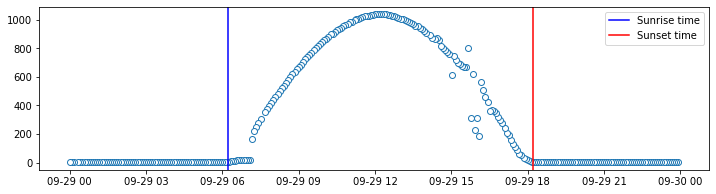

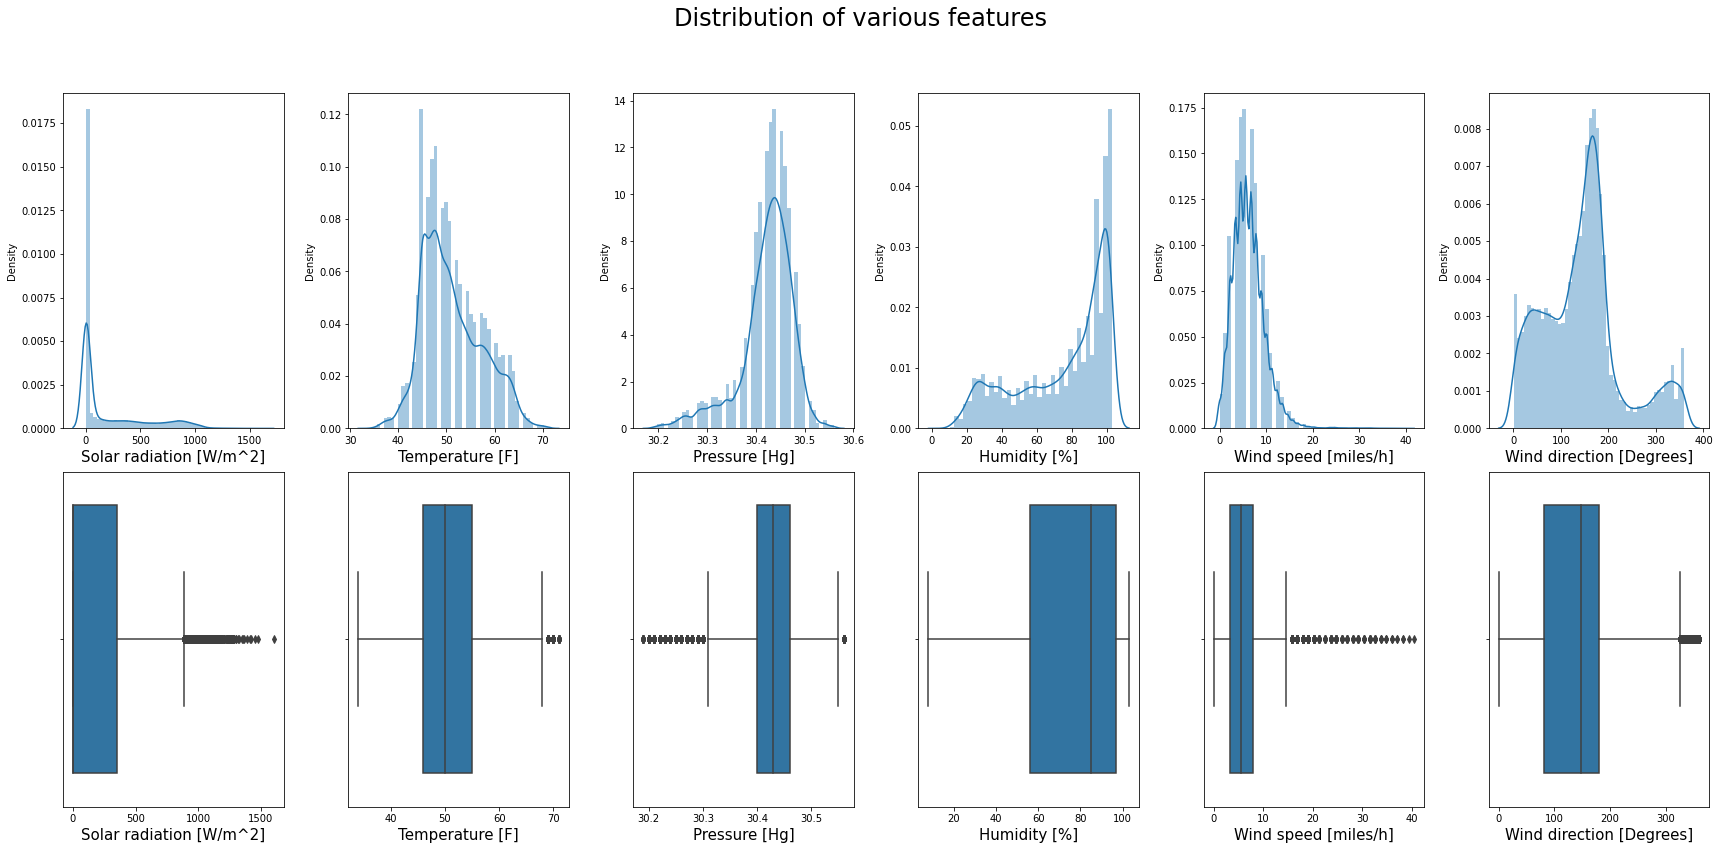

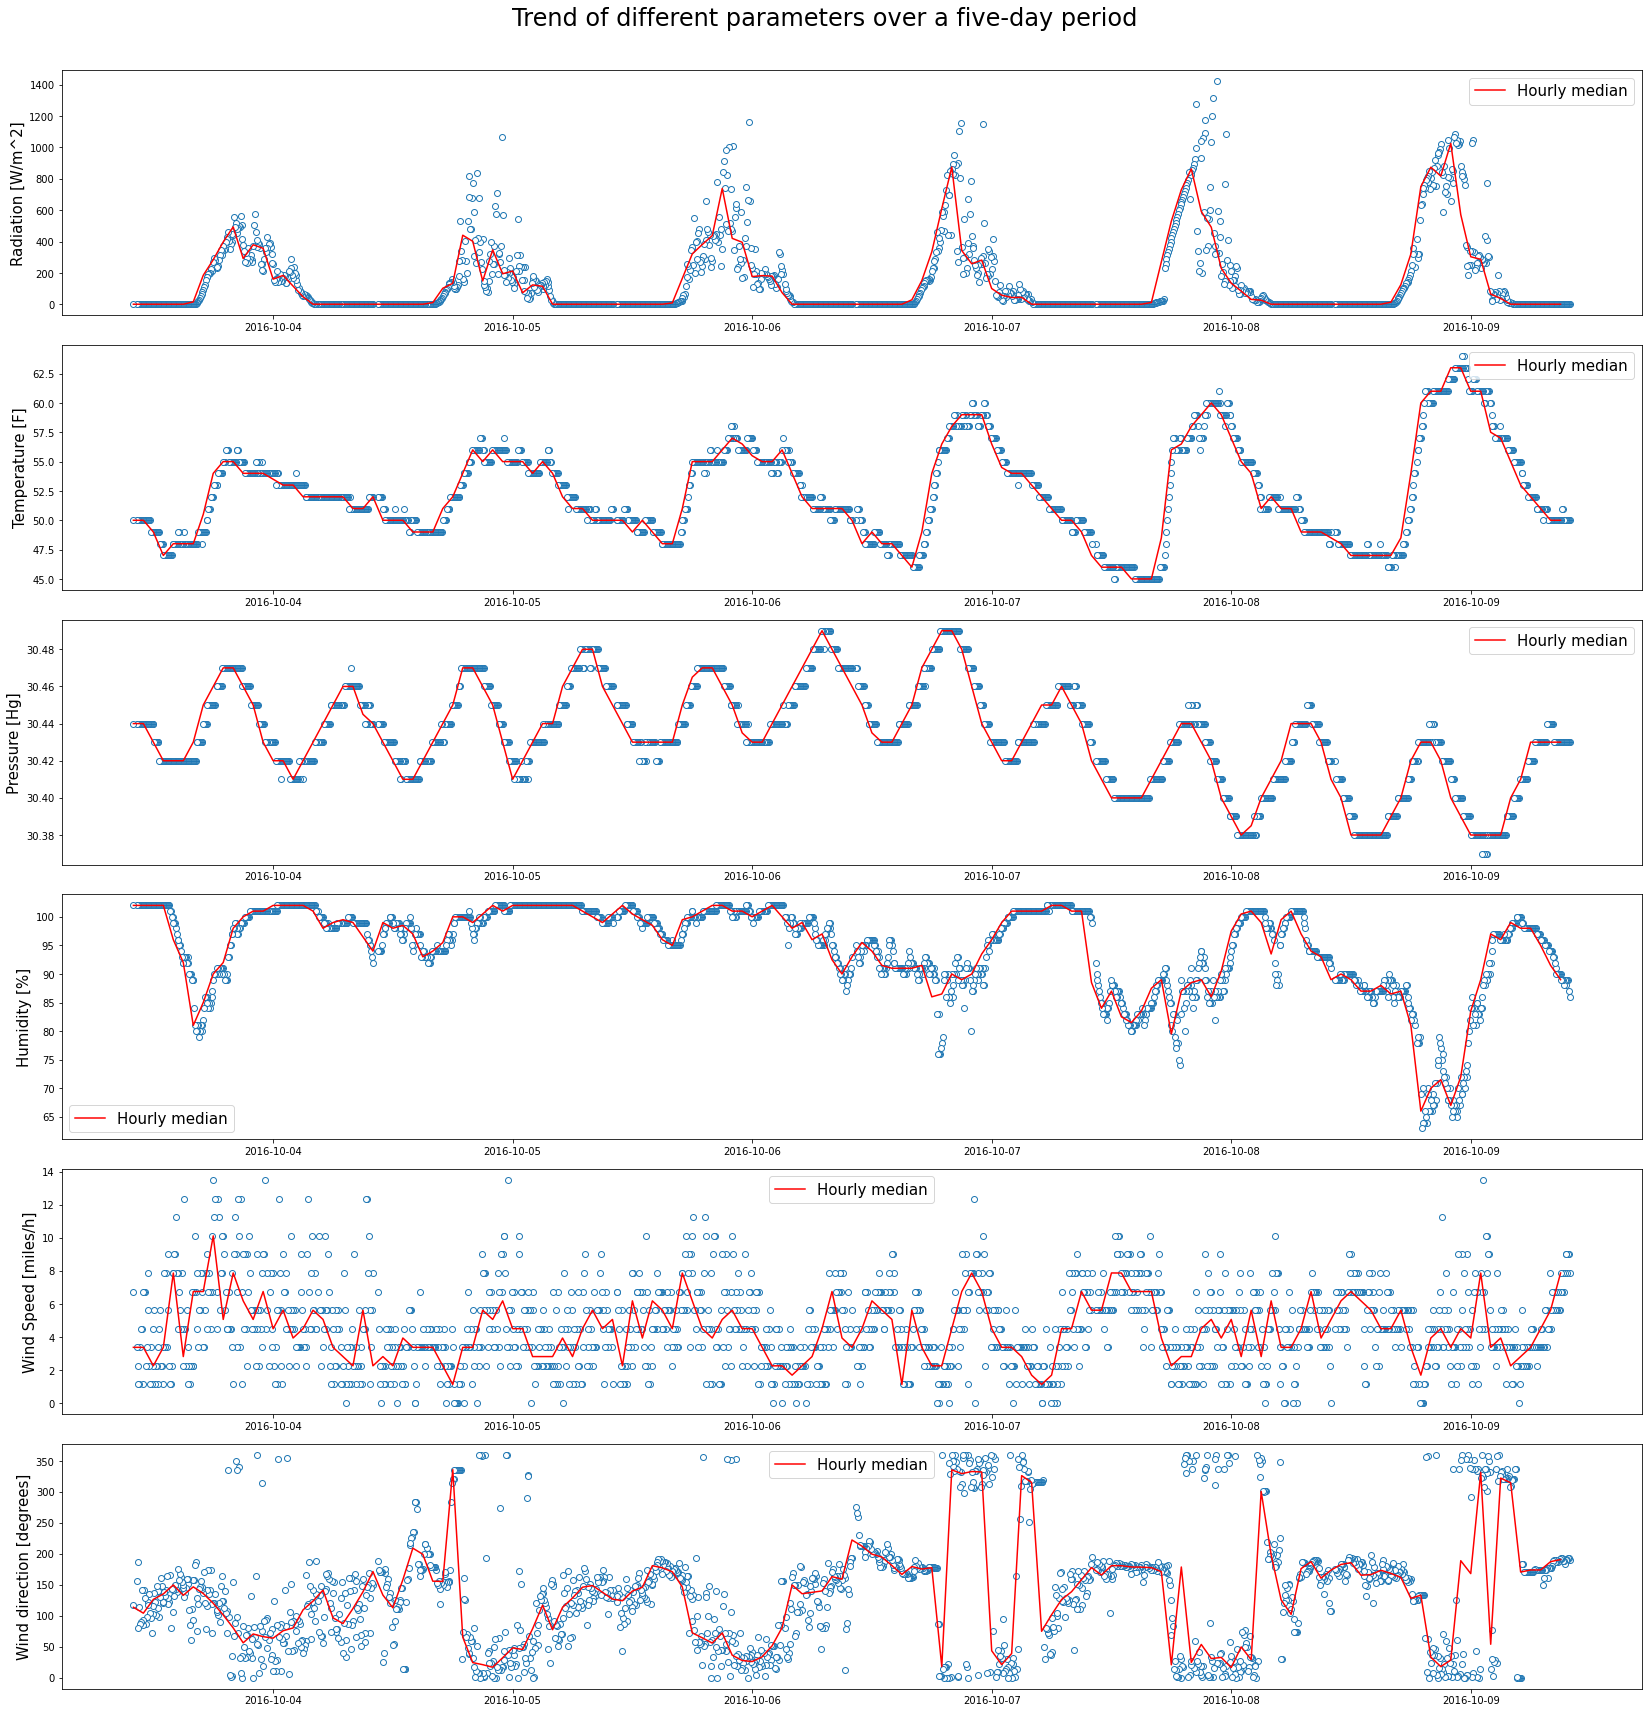

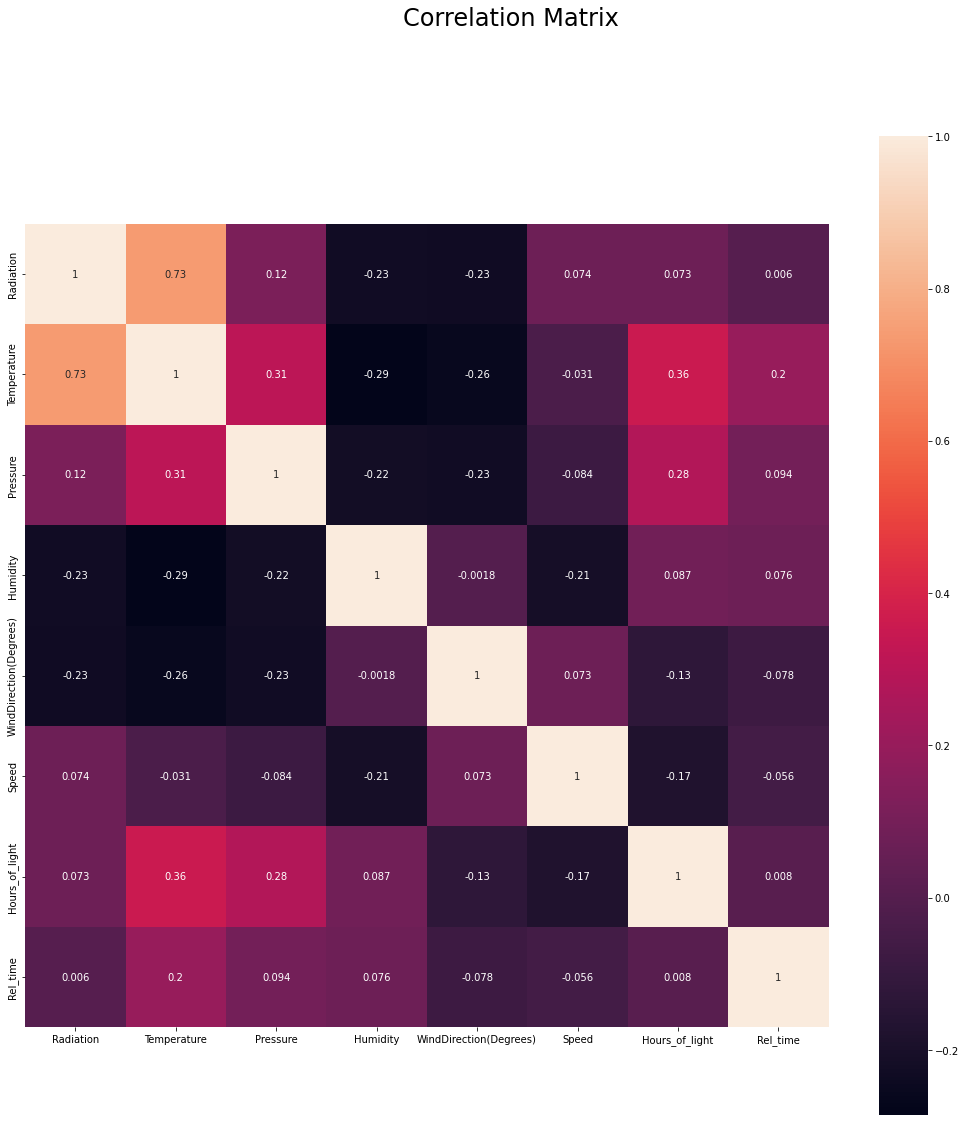

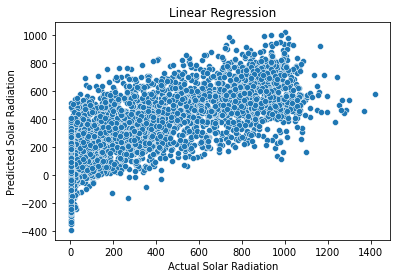

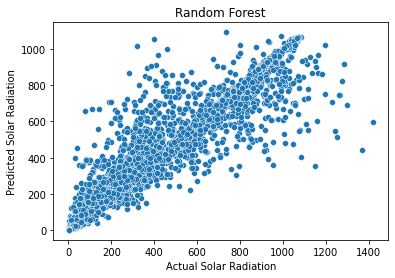

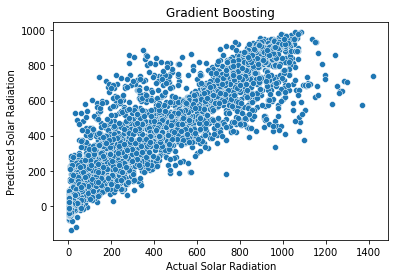

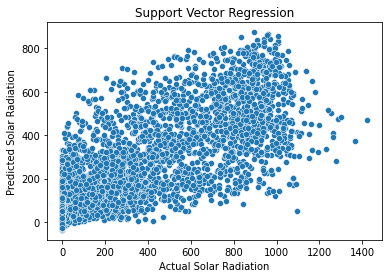

In [2]:
import cProfile,pstats

# Initializing profile class and calling rf function
profiler = cProfile.Profile()
profiler.enable()
main()
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')

# Print the stats report
stats.print_stats() 

In [3]:
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

         12995411 function calls (12916895 primitive calls) in 134.355 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.001    0.000  134.356   67.178 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3325(run_code)
   1297/2    0.037    0.000  134.355   67.178 {built-in method builtins.exec}
        1    0.039    0.039  134.355  134.355 C:\Users\srimo\AppData\Local\Temp\ipykernel_11828\1021070000.py:1(<cell line: 6>)
        1    0.104    0.104  134.316  134.316 C:\Users\srimo\AppData\Local\Temp\ipykernel_11828\1900689991.py:1(main)
        1    0.000    0.000   43.210   43.210 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:139(fit)
        1    0.000    0.000   43.207   43.20

      161    0.001    0.000    0.058    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:6397(_maybe_cast_data_without_dtype)
       48    0.001    0.000    0.058    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:50(map)
     5056    0.006    0.000    0.058    0.000 <__array_function__ internals>:177(amax)
       48    0.000    0.000    0.057    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\dates.py:1166(__call__)
      405    0.056    0.000    0.056    0.000 {function SeedSequence.generate_state at 0x00000258A0100A60}
      596    0.001    0.000    0.056    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x6

     2396    0.002    0.000    0.017    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\parser\_parser.py:195(__next__)
        1    0.000    0.000    0.017    0.017 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\__init__.py:1(<module>)
        2    0.000    0.000    0.017    0.009 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\backend_bases.py:1519(_get_renderer)
    65374    0.017    0.000    0.017    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\range.py:449(__iter__)
      553    0.003    0.000    0.017    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSo

       21    0.000    0.000    0.008    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py:5661(astype)
    14009    0.008    0.000    0.008    0.000 {method 'replace' of 'str' objects}
     2293    0.004    0.000    0.008    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1290(_to_unmasked_float_array)
    21236    0.008    0.000    0.008    0.000 {method 'pop' of 'dict' objects}
        1    0.000    0.000    0.008    0.008 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\common.py:1(<module>)
       17    0.000    0.000    0.008    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\

     25/6    0.001    0.000    0.003    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:3795(streamline)
       28    0.000    0.000    0.003    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_base.py:1847(apply_aspect)
        1    0.000    0.000    0.003    0.003 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:1(<module>)
        6    0.000    0.000    0.003    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:5516(_arith_method)
      401    0.002    0.000    0.003    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSo

      210    0.002    0.000    0.002    0.000 {method 'cumsum' of 'numpy.ndarray' objects}
       12    0.000    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:1024(_get_values)
      372    0.001    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\parser\_parser.py:434(append)
       10    0.000    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1082(_attach)
     8859    0.002    0.000    0.002    0.000 {built-in method _imp.release_lock}
      113    0.000    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\P

        1    0.000    0.000    0.001    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_mstats_common.py:1(<module>)
       31    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_base.py:53(__init__)
        1    0.000    0.000    0.001    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipywidgets\widgets\widget_date.py:1(<module>)
       30    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:6552(array)
        3    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareF

       10    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:7910(asarray)
      302    0.001    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:95(__init__)
      122    0.000    0.000    0.001    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\inspect.py:1985(_signature_is_builtin)
        7    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_base.py:122(_process_plot_format)
      130    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Loca

       25    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\figure.py:1552(_process_projection_requirements)
       95    0.000    0.000    0.000    0.000 {built-in method builtins.locals}
       14    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(empty_like)
       55    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:797(shape)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\colorbar.py:940(set_label)
       24    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCa

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\mathtext.py:190(MathtextBackendPs)
        8    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:5693(<genexpr>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\readers.py:813(close)
        1    0.000    0.000    0.000    0.000 {method 'draw_path_collection' of 'matplotlib.backends._backend_agg.RendererAgg' objects}
       63    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pand

       49    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:2324(_generateDefaultName)
       32    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\inference.py:359(is_sequence)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:1731(frozen)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\common.py:98(close)
      140    0.000    0.000    0.000    0.000 {method 'index' of 'list' objects}
       17    0.00

       17    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\base.py:414(register)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\managers.py:89(BaseBlockManager)
        4    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\enum.py:980(__or__)
       12    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(iscomplexobj)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\packaging\_structures.py:1(<module>)
       13    0.000    0.000    0.000    0.000 C:\U

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipywidgets\widgets\widget_selection.py:484(Select)
       66    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:1697(nlevels)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_trustregion_constr\canonical_constraint.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:1797(__init__)
       69    0.000    0.000    0.000    0.000 {method 'en

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\ops\methods.py:1(<module>)
        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexing.py:2073(ravel)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\readers.py:816(_get_options_with_defaults)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\moduleTNC.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\

        3    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\gzip.py:414(_read_exact)
        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\type_check.py:167(imag)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\floating.py:42(FloatingDtype)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\readers.py:414(validate_integer)
       11    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Loca

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\offsetbox.py:185(OffsetBox)
        7    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:232(_nanmin_dispatcher)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:8088(_convert2ma)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\numeric.py:384(Float64Index)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\Pyt

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\offsetbox.py:498(PaddedBox)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:1528(<listcomp>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\resample.py:1232(PeriodIndexResampler)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath._set_madvise_hugepage}
        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py:1390(_fixupChildren)
        1    0.0

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py:78(_MultimetricScorer)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_theil_sen.py:207(TheilSenRegressor)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cffi\model.py:239(FunctionPtrType)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cffi\model.py:261(PointerType)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\Py

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_internal.py:205(dummy_ctype)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\index_tricks.py:145(__init__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\index_tricks.py:110(nd_grid)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:1771(_trim_zeros)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftw

        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\concurrent\futures\process.py:140(_WorkItem)
        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\concurrent\futures\process.py:147(_ResultItem)
        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\multiprocessing\pool.py:63(ExceptionWithTraceback)
        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\multiprocessing\pool.py:794(MapResult)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\exceptions.py:54(ConvergenceWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB
Linear Regression: R^2=0.614, MAE=148.521, RMSE=195.899
Random Forest: R^2=0.929, MAE=32.274, RMSE=84.213
Gradient Boosting: R^2=0.883, MAE=

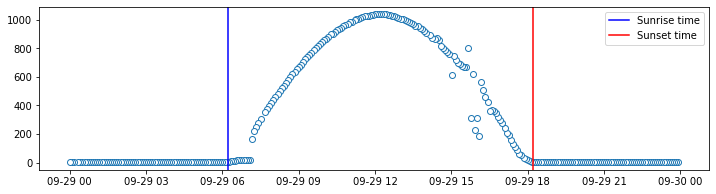

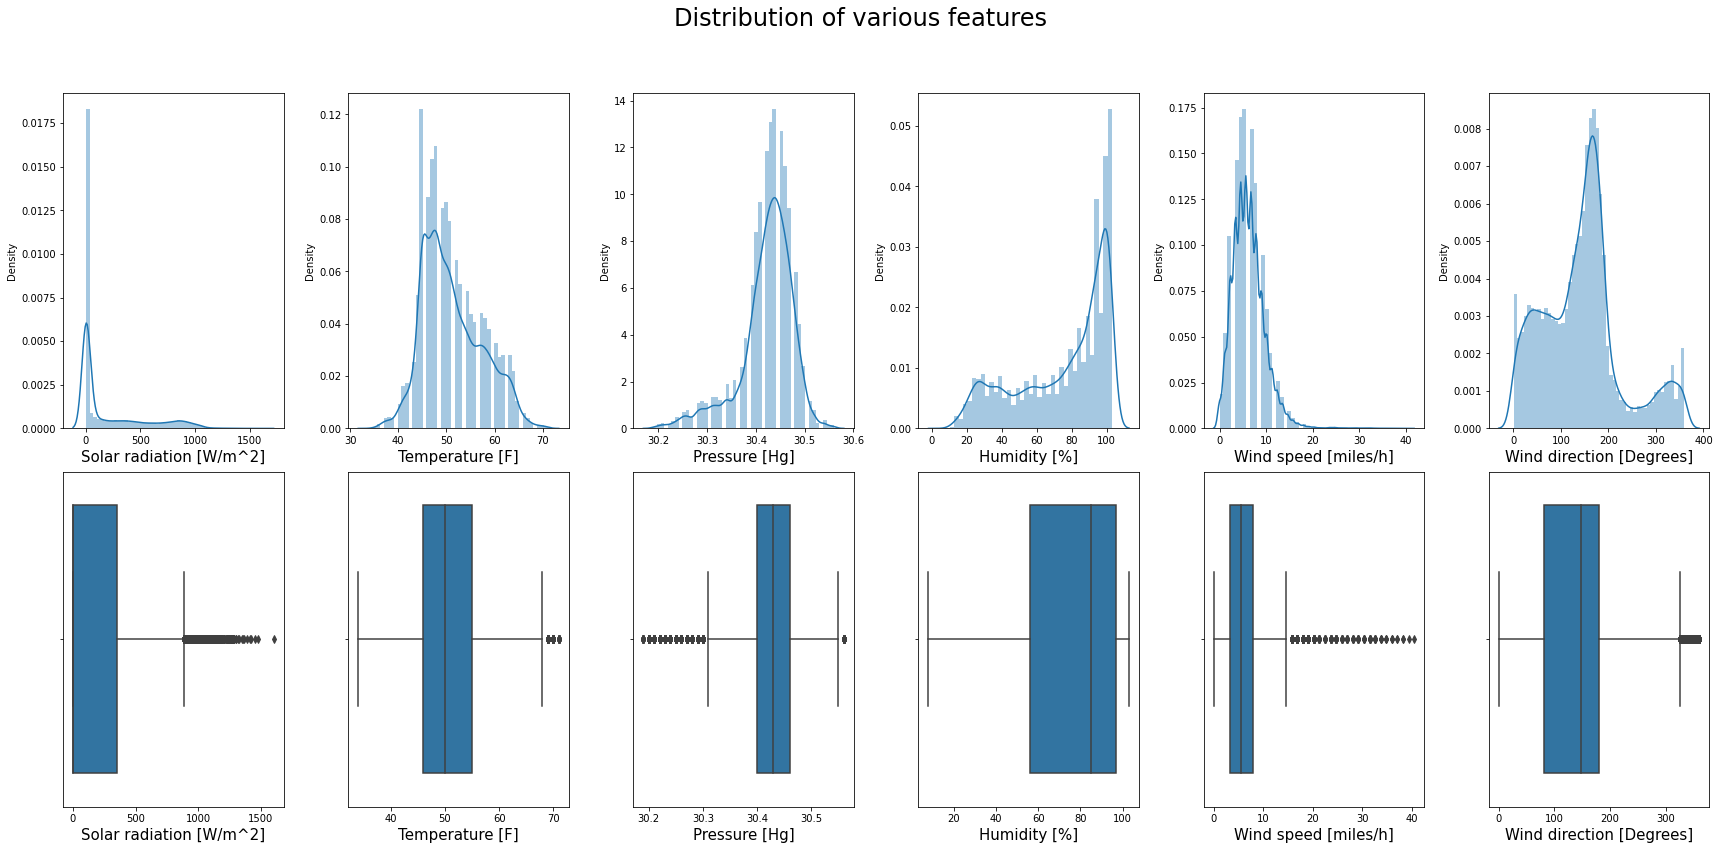

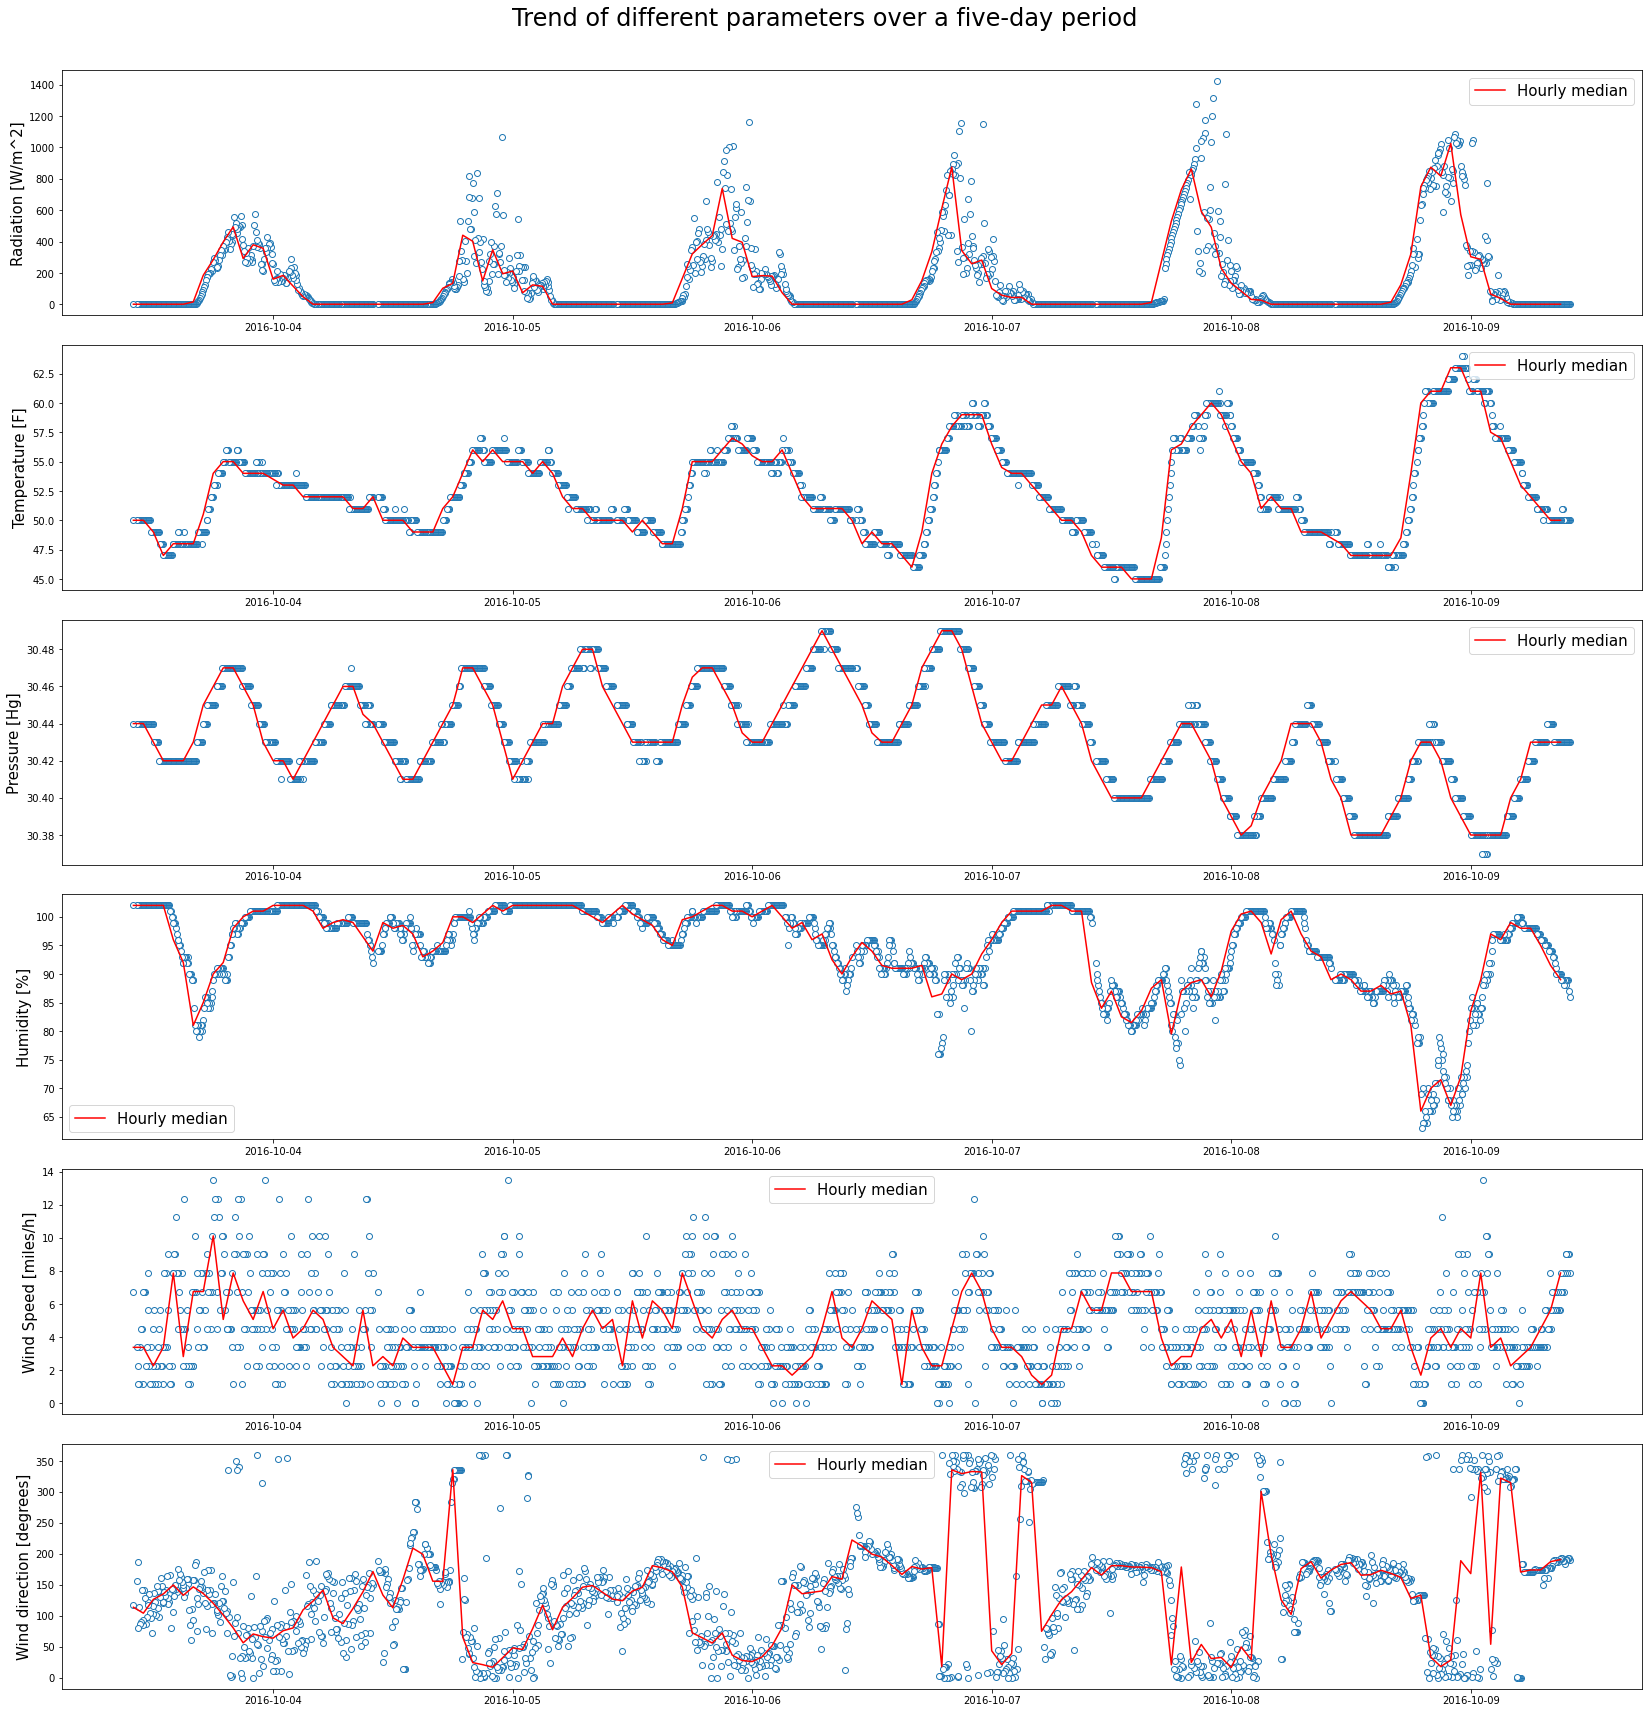

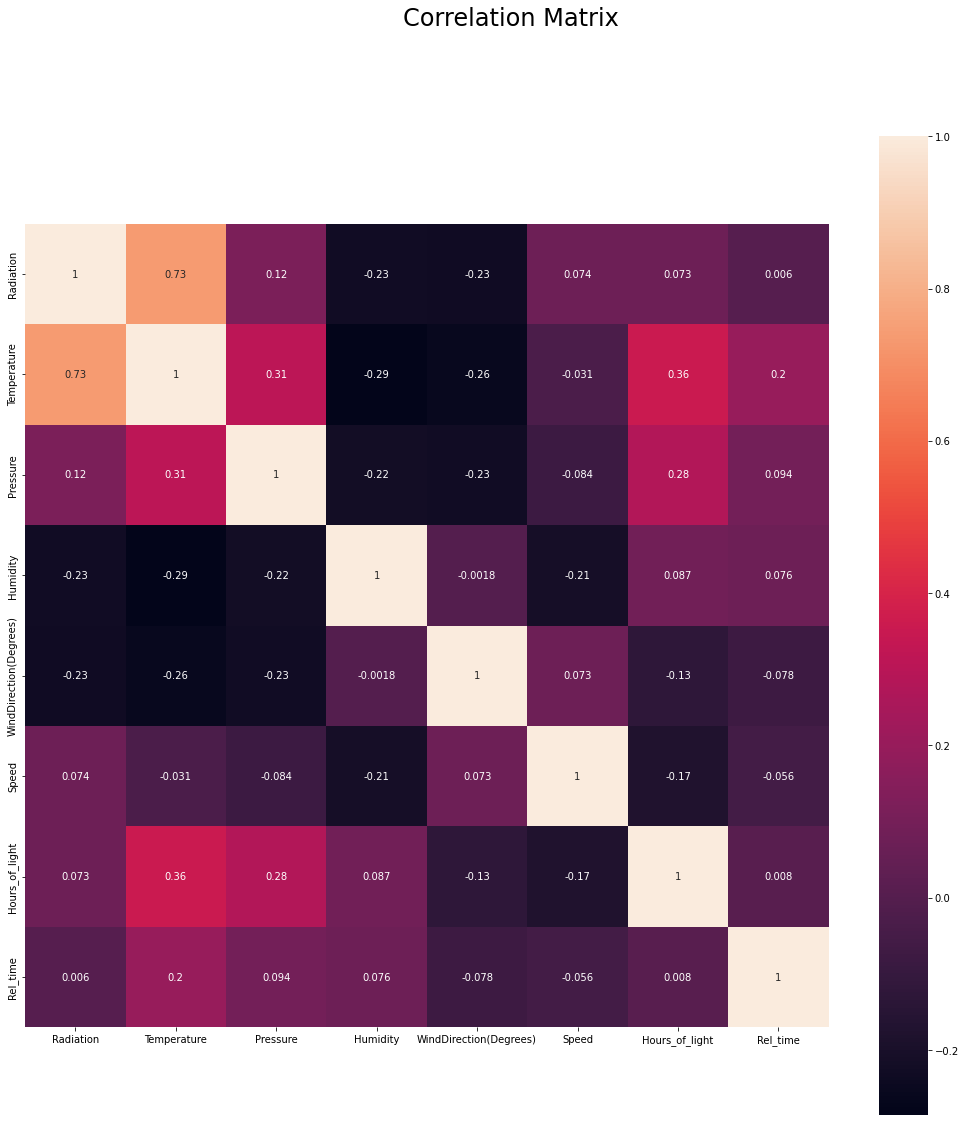

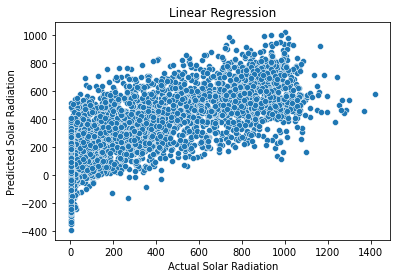

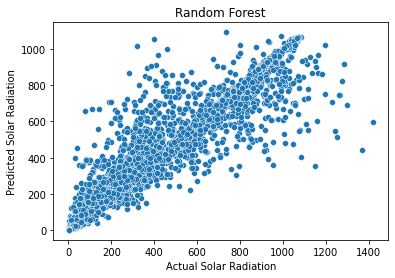

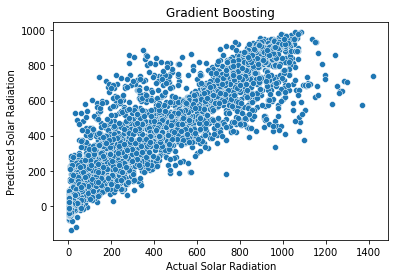

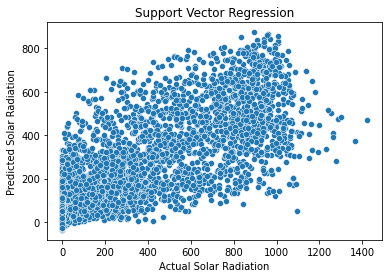

In [4]:
%load_ext snakeviz
%snakeviz main()